# Case 1 - Hotel customer segmentation 

Alexandre - 20240568 <br>
Diogo Melo - 20240698 <br>
Gonçalo Varanda - 20240691 <br>
Miguel Ferreira - 20240569



### This Notebook uses the "Case1_HotelCustomerSegmentation.csv" dataset

### Dataset description:

Dataset of a Hotel in Portugal, with information and preferences regarding customer bookings.

#### Hotel client data:
- **ID**: numeric - Customer ID
- **age**: numeric - age of the customer
- **namehash**: hash of the customer's name (categorical)
- **docIDhash**: hash of the customer’s personal document identification number (usually a passport or ID card) (categorical)
- **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **nationality**: nationality of the customer in ISO 3166-1 (Alpha 3) format (categorical)

#### Related with the bookings:
- **AverageLeadTime**: numeric - Average number of days before arrival date the customer makes bookings
- **LodgingRevenue**: numeric - Total amount of lodging revenue paid by the customer so far
- **OtherRevenue**: numeric - Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
- **PersonNights**: numeric - Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights(Length-of-stay) of the booking
- **RoomNights**: numeric - Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of-stay) of the booking
- **DistributionChannel**: Distribution channel normally used by the customer to make bookings at the hotel (categorical: 'Corporate','Travel Agent/Operator','Direct','GDS Systems')
- **MarketSegment**: Current market segment of the customer (categorical: 'Corporate','Travel Agent/Operator','Direct','Aviation','Groups','Complementary','Other')
- **BookingsCanceled**: numeric - Number of bookings the customer made but subsequently canceled
- **BookingsNoShowed**: numeric - Number of bookings the customer made but subsequently made a "no-show"
- **BookingsCheckedin**: numeric - Number of bookings the customer made, which actually ended up staying

#### Preferences: (Indication if the customer usually asks for a...)
- **SRHighFloor**: room in a higher floor (0: No, 1: Yes)
- **SRLowFloor**: room in a lower floor (0: No, 1: Yes) 
- **SRAccessibleRoom**: accessible room (0: No, 1: Yes) 
- **SRMediumFloor**: room in a middle floor (0: No, 1: Yes)
- **SRBathtub**: room with a bathtub (0: No, 1: Yes)
- **SRShower**: room with a shower (0: No, 1: Yes)
- **SRCrib**: crib (0: No, 1: Yes) 
- **SRKingSizeBed**: room with a king size bed (0: No, 1: Yes)
- **SRTwinBed**: room with a twin bed (0: No, 1: Yes)
- **SRNearElevator**: room near the elevator (0: No, 1: Yes)
- **SRAwayFromElevator**: room away from the elevator (0: No, 1: Yes) 
- **SRNoAlcoholInMiniBar**: room with no alcohol in the mini bar (0: No, 1: Yes)
- **SRQuietRoom**: room away from the noise (0: No, 1: Yes)


### Possible aditional metadata:

- **is_european**: If the customer is european (0: No, 1: Yes)
- **is_portuguese**: If the customer is portuguese (0: No, 1: Yes)
- **nation_by_continent**: Group countries in Continents to reduce high cardinality / or Zones (Ex: North America, South of Europe...)
- **age_category**: Create age categories based on common sense or statistics.
- **total_bookings_paid**: Sum of bookings ordered (showed + not showed)
- **mean_total_bookings_paid**: mean of total value of bookings (showed + not showed)
- **PersonRoomNights**: addition of PersonNights with RoomNights <br>
TotalRevenue: LodgingRevenue + OtherRevenue
PreferredFloor: Categorization based on (SRHighFloor, SRMediumFloor, SRLowFloor)
PreferredBedType: Categorization based on (SRKingSizeBed, SRTwinBed)
PreferredBathroomType: Categorization based on (SRBathtub, SRShower)
NoisePreference: Categorization based on (SRQuietRoom, SRAwayFromElevator, SRNearElevator)
BookingFrequency = TotalBookings / DaysSinceCreation




<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 1 Import the needed libraries
    

</div>

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import ticker
from sklearn.impute import KNNImputer


# encoders

# Models

# Metrics 

# Others
#%pip install pycountry
import pycountry

# for better resolution plots and others


<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 2 Data Understanding
    

</div>

In [2]:
df = pd.read_csv("Case1_HotelCustomerSegmentation.csv", sep=';', index_col='ID')
df.head()

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_original=df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

We might remove the columns `NameHash` and `DocIDHash` 

In [5]:
df.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,107561.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
mean,45.639191,595.026599,60.833147,283.851283,64.682802,0.002282,0.000600,0.737607,4.328318,2.203825,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,17.244952,374.657382,85.115320,379.131556,123.580715,0.080631,0.028217,0.730889,4.630739,2.301637,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,-10.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,522.000000,21.000000,208.000000,31.000000,0.000000,0.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,889.000000,95.000000,393.300000,84.000000,0.000000,0.000000,1.000000,6.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,123.000000,1385.000000,588.000000,21781.000000,8859.250000,15.000000,3.000000,76.000000,116.000000,185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# missing values
df.isna().sum().sort_values(ascending=False)

Age                     4172
DocIDHash               1001
Nationality                0
SRHighFloor                0
SRNoAlcoholInMiniBar       0
SRAwayFromElevator         0
SRNearElevator             0
SRTwinBed                  0
SRKingSizeBed              0
SRCrib                     0
SRShower                   0
SRBathtub                  0
SRMediumFloor              0
SRAccessibleRoom           0
SRLowFloor                 0
MarketSegment              0
DistributionChannel        0
RoomNights                 0
PersonsNights              0
BookingsCheckedIn          0
BookingsNoShowed           0
BookingsCanceled           0
OtherRevenue               0
LodgingRevenue             0
AverageLeadTime            0
NameHash                   0
DaysSinceCreation          0
SRQuietRoom                0
dtype: int64

Duplicated rows

In [7]:
df.duplicated().sum()

111

In [8]:
df_duplicates = df[df.duplicated()]
df_duplicates

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
595,ROU,38.0,1365,0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...,0x9CD129744684370C750190DB02D767653BB96C8119B3...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
702,BRA,26.0,1359,0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...,0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1111,PRT,NaN,1345,0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391,PRT,NaN,1340,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1403,PRT,NaN,1340,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105601,PRT,NaN,84,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
107560,PRT,NaN,69,0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
107561,PRT,NaN,69,0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC...,NaN,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Drop the duplicated rows, but keep one of them to not lose data

df = df.drop_duplicates(keep='first')

In [10]:
#Make sure the rows were properly dropped
df.duplicated().sum()


0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111622 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111622 non-null  object 
 1   Age                   107530 non-null  float64
 2   DaysSinceCreation     111622 non-null  int64  
 3   NameHash              111622 non-null  object 
 4   DocIDHash             110690 non-null  object 
 5   AverageLeadTime       111622 non-null  int64  
 6   LodgingRevenue        111622 non-null  float64
 7   OtherRevenue          111622 non-null  float64
 8   BookingsCanceled      111622 non-null  int64  
 9   BookingsNoShowed      111622 non-null  int64  
 10  BookingsCheckedIn     111622 non-null  int64  
 11  PersonsNights         111622 non-null  int64  
 12  RoomNights            111622 non-null  int64  
 13  DistributionChannel   111622 non-null  object 
 14  MarketSegment         111622 non-null  object 
 15  SRHig

The group observed the presence of negative values in the columns `Age` and `AverageLeadTime`

In [12]:
# maybe just replace by mean of Nationality and DistributionChannel or MarketSegment
df[df["Age"] < 0]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6.0,1324,0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...,0x9ED63F460C900B662B890A825398EA74E2AB649383BB...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6.0,1319,0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...,0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...,0,0.00,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8.0,1271,0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...,0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...,66,93.30,14.00,0,0,...,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10.0,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.00,18.00,0,0,...,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6.0,1217,0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...,0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...,256,126.00,109.00,0,0,...,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9.0,1213,0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...,0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...,111,414.60,34.00,0,0,...,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5.0,1193,0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...,0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...,54,138.93,29.50,0,0,...,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9.0,1181,0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...,0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...,292,126.00,113.00,0,0,...,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9.0,1181,0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...,0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...,292,128.00,57.50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df[df["AverageLeadTime"] < 0]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
23064,PRT,NaN,964,0x498F10CD065519D5A08A680309214C7911457CF2A5CC...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,-1,352.00,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0
29374,USA,25.0,870,0xEEE451C018A695CC592A21016B9713CCE1CAD0CEF039...,0x855CC6ADF35259086B24B2639DD34563A20FD464BF0B...,-1,77.49,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
51375,CHN,33.0,558,0x61B41490861314B7148F76EE7D7E17A240A86B45259D...,0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...,-1,129.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58655,FRA,57.0,499,0x7E60C14F1CDF540841373495CA352FA8579EA1166911...,0xD3D49D29C16B32E2DF23CB16128500175E12671B6DD3...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58662,FRA,62.0,499,0x8F817FC15C5606A27141C5FF717456FA9D3D7CE71A48...,0xE71E1E35741B667B50E3BDAD6AE5AE2283DDA0FE50F5...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
58676,FRA,61.0,499,0x7DD53BA3E94C8D8B171B9D50041DC3A23E6F4752A3A8...,0x814B89362FCA5770AEDC4485136D7F673F78793CE218...,-1,149.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
60590,ESP,46.0,485,0xBBBA5623819CD060BB49D9D700348FFEF885F825D019...,0x54D0B32490EA6DAB16F26AFBDAD5037A89E1BDA62B54...,-1,159.00,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
62690,USA,70.0,468,0x4567E92118939CF20A432369E32BA8959502682AD473...,0x2A1EA7292AF2D9BB083726E0961A38A54950480886BA...,-1,95.20,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
68486,GBR,46.0,424,0x2FFEF9FB8750A5B78550558BCAB6E6FE0EEFB92B53F9...,0x8FDCAADFD9772221E36C47D962BF5BEFC049103778EC...,-1,282.00,24.0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Negative Values to fix / see:**
 - Age (14 cells)
 - AverageLeadTime (13 cells)

Bookings Variables

In [14]:
df['BookingsCanceled'].value_counts()

BookingsCanceled
0     111456
1        125
2         19
3         11
4          8
15         1
7          1
5          1
Name: count, dtype: int64

In [15]:
df['BookingsNoShowed'].value_counts()

BookingsNoShowed
0    111565
1        48
2         8
3         1
Name: count, dtype: int64

In [16]:
df['BookingsCheckedIn'].describe()

count    111622.000000
mean          0.738188
std           0.730932
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          76.000000
Name: BookingsCheckedIn, dtype: float64

`PersonNights`

(Number of Adults + Number of Children) × Number of Nights

High PersonNights value might represent guests that stayed longer or with more people and means higher revenue from hotel services.

In [17]:
df['PersonsNights'].describe()

count    111622.000000
mean          4.332049
std           4.631061
min           0.000000
25%           0.000000
50%           4.000000
75%           6.000000
max         116.000000
Name: PersonsNights, dtype: float64

`RoomNights `

(Number of Rooms) × (Number of nights)

In [18]:
df['RoomNights'].describe()

count    111622.000000
mean          2.205694
std           2.301791
min           0.000000
25%           0.000000
50%           2.000000
75%           3.000000
max         185.000000
Name: RoomNights, dtype: float64

In [19]:
df["DistributionChannel"].value_counts()

DistributionChannel
Travel Agent/Operator    90917
Direct                   16876
Corporate                 3133
GDS Systems                696
Name: count, dtype: int64

In [20]:
# imensas nacionalidades - tentar agrupar por continentes ou regiões
df["Nationality"].unique()

array(['PRT', 'DEU', 'FRA', 'JPN', 'IRL', 'ESP', 'BEL', 'NLD', 'AUT',
       'ITA', 'CHN', 'RUS', 'POL', 'USA', 'HUN', 'CRI', 'MEX', 'CHE',
       'ROU', 'GBR', 'BIH', 'BRA', 'FIN', 'AGO', 'CAN', 'ZAF', 'TWN',
       'GRC', 'AUS', 'ISR', 'BGR', 'SAU', 'SWE', 'ARG', 'ARM', 'CHL',
       'MAR', 'MOZ', 'KOR', 'TUN', 'DNK', 'NOR', 'MYS', 'EGY', 'IND',
       'HRV', 'CPV', 'JOR', 'COD', 'DZA', 'LUX', 'TUR', 'IRN', 'LBY',
       'PAN', 'COL', 'VEN', 'GNB', 'CZE', 'AND', 'SVN', 'PER', 'ATF',
       'UGA', 'AZE', 'NZL', 'LTU', 'SRB', 'EST', 'KAZ', 'KWT', 'IDN',
       'UKR', 'SVK', 'MLI', 'ARE', 'BGD', 'THA', 'TZA', 'LVA', 'PHL',
       'BHR', 'NAM', 'BOL', 'CYP', 'SGP', 'CMR', 'MLT', 'URY', 'PAK',
       'JAM', 'ECU', 'SYC', 'QAT', 'PRY', 'BRB', 'OMN', 'TMP', 'ABW',
       'LBN', 'AIA', 'SLV', 'DMA', 'CUB', 'VNM', 'GEO', 'IRQ', 'GAB',
       'PYF', 'LIE', 'SEN', 'BLR', 'ISL', 'DOM', 'GUY', 'LCA', 'ATA',
       'NGA', 'RWA', 'CIV', 'ALB', 'MKD', 'MNE', 'GTM', 'GHA', 'MDV',
       'MCO', 'MUS',

In [21]:
# Function to get country names from ISO alpha-3 codes
def get_country_name(alpha3_code):
    try:
        return pycountry.countries.get(alpha_3=alpha3_code).name
    except AttributeError:
        return 'Unknown code'

# Apply the function to the 'nationality' column
df['country_name'] = df['Nationality'].apply(get_country_name)
df['country_name'].unique()


array(['Portugal', 'Germany', 'France', 'Japan', 'Ireland', 'Spain',
       'Belgium', 'Netherlands', 'Austria', 'Italy', 'China',
       'Russian Federation', 'Poland', 'United States', 'Hungary',
       'Costa Rica', 'Mexico', 'Switzerland', 'Romania', 'United Kingdom',
       'Bosnia and Herzegovina', 'Brazil', 'Finland', 'Angola', 'Canada',
       'South Africa', 'Taiwan, Province of China', 'Greece', 'Australia',
       'Israel', 'Bulgaria', 'Saudi Arabia', 'Sweden', 'Argentina',
       'Armenia', 'Chile', 'Morocco', 'Mozambique', 'Korea, Republic of',
       'Tunisia', 'Denmark', 'Norway', 'Malaysia', 'Egypt', 'India',
       'Croatia', 'Cabo Verde', 'Jordan',
       'Congo, The Democratic Republic of the', 'Algeria', 'Luxembourg',
       'Türkiye', 'Iran, Islamic Republic of', 'Libya', 'Panama',
       'Colombia', 'Venezuela, Bolivarian Republic of', 'Guinea-Bissau',
       'Czechia', 'Andorra', 'Slovenia', 'Peru',
       'French Southern Territories', 'Uganda', 'Azerbaijan',
  

In [22]:
# TMP - Unknown code - After Search - "Timor-Leste"
df[df['country_name'] == "Unknown code"]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
9224,TMP,4.0,1205,0x56C32FBE43CE6E22529F453FDA238DC29B3D2DF27157...,0x52616FF3903E6D7E0F1430960F4686A67179480E1EFE...,41,325.8,107.0,0,0,...,0,0,0,1,0,0,0,0,0,Unknown code


In [23]:
# replace the only Unknown code.
df['country_name'].replace('Unknown code', 'Timor-Leste', inplace= True)
df[df['country_name'] == "Timor-Leste"]

# drop original column with 3 digits ind.
df.drop(columns='Nationality', inplace=True)

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_4192\1650527839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country_name'].replace('Unknown code', 'Timor-Leste', inplace= True)


In [24]:
# label "OTHER" --> see
df["MarketSegment"].value_counts()

MarketSegment
Other                    63593
Direct                   16358
Travel Agent/Operator    16347
Groups                   11450
Corporate                 2931
Complementary              655
Aviation                   288
Name: count, dtype: int64

In [25]:
df["OtherRevenue"].mean()

64.74199996416476

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 3 EDA
    

</div>

In [26]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
binary_features = df.columns[df.columns.str.startswith('SR')].tolist()
metric_features = [feature for feature in numeric_features if feature not in binary_features]
non_metric_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

Histograms

Text(0.5, 0.98, 'Histograms with 30 bins of all numeric variables')

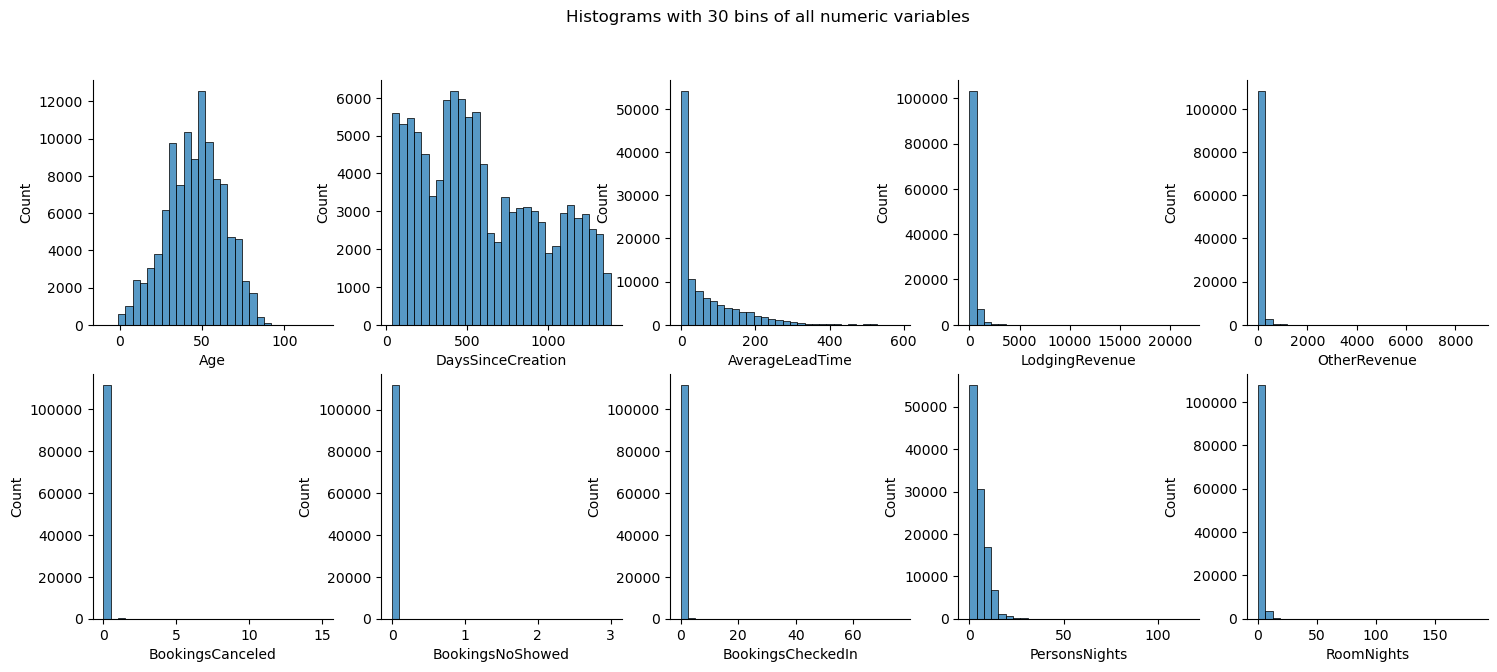

In [27]:
# HISTOGRAM of metric features

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,7))
for var, subplot in zip(df[metric_features], ax.flatten()):
    g = sns.histplot(data=df,
                bins=30,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Histograms with 30 bins of all numeric variables", fontsize=12)

Scatter Plots

In [28]:
# Pairwise Relationship of Numerical Variables
#sns.set()

# Setting pairplot
#sns.pairplot(df[metric_features], diag_kind="hist")

# Layout
#plt.subplots_adjust(top=0.95)
#plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
#plt.show()

In [29]:
df_eda = df.copy()

see also dif in total and mean / median

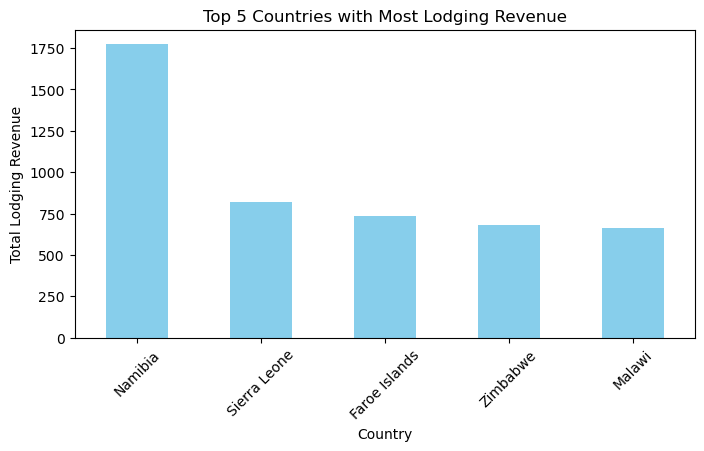

In [30]:
# Calculate total lodging revenue per nationality
total_revenue_per_country = df_eda.groupby('country_name')['LodgingRevenue'].mean()

# Sort by revenue and select top 5 countries
top_5_countries = total_revenue_per_country.nlargest(5)

# Plotting
plt.figure(figsize=(8, 4))
top_5_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Most Lodging Revenue')
plt.xlabel('Country')
plt.ylabel('Total Lodging Revenue')
plt.xticks(rotation=45)
plt.show()


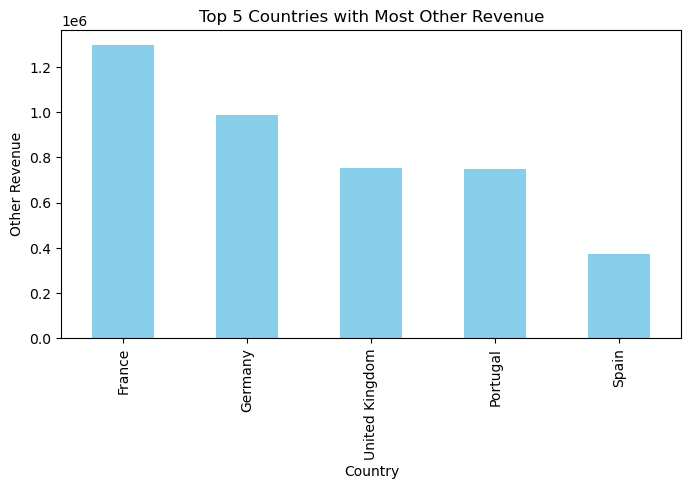

In [31]:
other_revenue_per_country = df_eda.groupby('country_name')["OtherRevenue"].sum()
top_5_countries_other = other_revenue_per_country.nlargest(5).sort_values(ascending=False)

plt.figure(figsize=(8,4))
top_5_countries_other.plot(kind='bar', xlabel='Country', ylabel='Other Revenue', title='Top 5 Countries with Most Other Revenue', color='Skyblue')
plt.show()

There are many cases where most of important data is Zero, only client information is provided. What is this? Errors or data about the other members? Are those important from our analysis?

Grouping nationalities per continent


In [32]:
continent_nationality = {
    'Europe': [
        'Portugal', 'Germany', 'France', 'Ireland', 'Spain', 'Italy', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Russian Federation', 'Poland', 'Hungary', 'Romania',
        'United Kingdom', 'Bosnia and Herzegovina', 'Finland', 'Greece', 'Bulgaria', 'Sweden', 'Denmark', 'Norway', 'Croatia', 'Luxembourg', 'Türkiye', 'Czechia', 'Andorra',
        'Slovenia', 'Lithuania', 'Serbia', 'Estonia', 'Ukraine', 'Slovakia', 'Latvia', 'Cyprus', 'Malta', 'Belarus', 'Iceland', 'Albania', 'North Macedonia', 'Montenegro',
        'Liechtenstein', 'Monaco', 'San Marino', 'Gibraltar', 'Faroe Islands', 'Jersey', 'Svalbard and Jan Mayen'
    ],
    'Asia': [
        'Japan', 'China', 'Taiwan, Province of China', 'Korea, Republic of', 'India', 'Bangladesh', 'Pakistan', 'Sri Lanka', 'Nepal', 'Afghanistan', 'Malaysia', 'Indonesia', 'Thailand',
        'Philippines', 'Timor-Leste', 'Singapore', 'Viet Nam', 'Israel', 'Saudi Arabia', 'Iran, Islamic Republic of', 'United Arab Emirates', 'Bahrain', 'Qatar', 'Oman', 'Jordan',
        'Lebanon', 'Iraq', 'Kuwait', 'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan', 'Uzbekistan', 'Tajikistan', 'Kyrgyzstan', 'Turkmenistan', 'Hong Kong',
        "Lao People's Democratic Republic", 'Myanmar', 'Syrian Arab Republic', 'Maldives', 'Yemen'
    ],
    'America': [
        'United States', 'Costa Rica', 'Mexico', 'Canada', 'Panama', 'Colombia', 'Venezuela, Bolivarian Republic of', 'Peru', 'Brazil', 'Argentina', 'Chile',
        'Bolivia, Plurinational State of', 'Ecuador', 'Uruguay', 'Paraguay', 'Guyana', 'Suriname', 'French Guiana', 'Jamaica', 'Cuba', 'Dominican Republic',
        'El Salvador', 'Dominica', 'Haiti', 'Guatemala', 'Honduras', 'Nicaragua', 'Puerto Rico', 'Saint Kitts and Nevis', 'Cayman Islands', 'Bahamas',
        'Barbados', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Antigua and Barbuda', 'Trinidad and Tobago', 'Grenada', 'Aruba', 'Falkland Islands (Malvinas)',
        'Saint Pierre and Miquelon', 'Bermuda', 'Virgin Islands, U.S.', 'United States Minor Outlying Islands', 'Anguilla'
    ],
    'Africa': [
        'Angola', 'South Africa', 'Morocco', 'Mozambique', 'Tunisia', 'Egypt', 'Cabo Verde', 'Congo, The Democratic Republic of the', 'Algeria', 'Libya',
        'Guinea-Bissau', 'Mali', 'Tanzania, United Republic of', 'Namibia', 'Cameroon', 'Seychelles', 'Senegal', 'Nigeria', 'Rwanda', "Côte d'Ivoire", 'Ghana',
        'Mauritius', 'Togo', 'Kenya', 'Mauritania', 'Uganda', 'Central African Republic', 'Sao Tome and Principe', 'Sudan', 'Sierra Leone', 'Comoros', 'Ethiopia', 'Benin',
        'Zimbabwe', 'Botswana', 'Eritrea', 'Equatorial Guinea', 'Madagascar', 'Guinea', 'Eswatini', 'Somalia', 'Malawi', 'Chad', 'Gabon', 'Burkina Faso', 'Burundi', 'Niger'


    ],
    'Oceania': [
        'Australia', 'New Zealand', 'French Polynesia', 'New Caledonia', 'Kiribati', 'Papua New Guinea', 'Samoa', 'American Samoa', 'Wallis and Futuna', 'Fiji', 'Tonga',
        'Pitcairn', 'Cook Islands', 'Nauru', 'Micronesia, Federated States of', 'British Indian Ocean Territory'
    ],
    'Antartida': [
        'Antarctica', 'French Southern Territories'
    ]
}


In [33]:
# Create a column with the continent of each country
df['continent'] = df['country_name'].apply(lambda x: next((k for k, v in continent_nationality.items() if x in v), 'Unknown'))


In [34]:
df[df['continent'] == 'Unknown']['country_name'].unique()

array([], dtype=object)

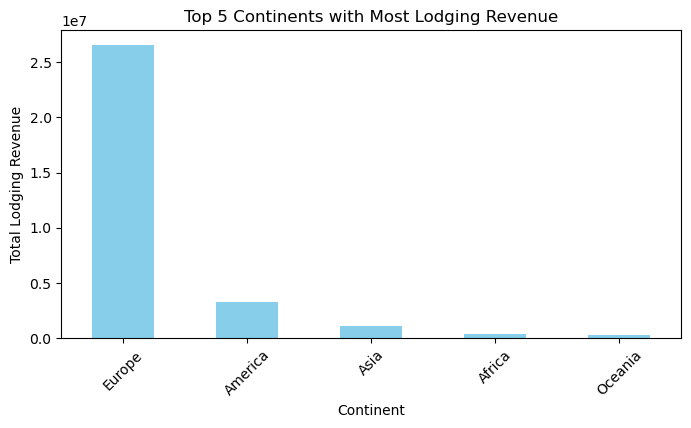

In [35]:
# Calculate total lodging revenue per continent
total_revenue_per_continent = df.groupby('continent')['LodgingRevenue'].sum()

# Sort by revenue and select top 5 countries
top_5_continents = total_revenue_per_continent.nlargest(5)

# Plotting
plt.figure(figsize=(8, 4))
top_5_continents.plot(kind='bar', color='skyblue')
plt.title('Top 5 Continents with Most Lodging Revenue')
plt.xlabel('Continent')
plt.ylabel('Total Lodging Revenue')
plt.xticks(rotation=45)
plt.show()


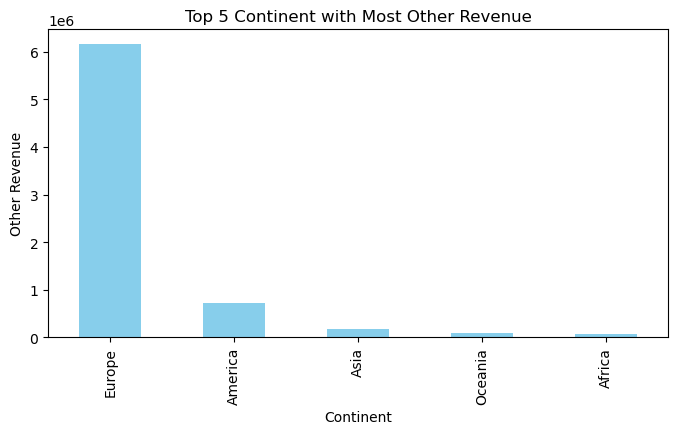

In [36]:
other_revenue_per_continent = df.groupby('continent')["OtherRevenue"].sum()
top_5_continent_other = other_revenue_per_continent.nlargest(5).sort_values(ascending=False)

plt.figure(figsize=(8,4))
top_5_continent_other.plot(kind='bar', xlabel='Continent', ylabel='Other Revenue', title='Top 5 Continent with Most Other Revenue', color='Skyblue')
plt.show()

In [37]:
# df_eda[(df_eda['LodgingRevenue'] == 0) & (df_eda['OtherRevenue'] == 0)] 33k obs with zeros everywhere
df_eda[(df_eda['LodgingRevenue'] == 0) & (df_eda['OtherRevenue'] != 0)]

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
59,NaN,1385,0x51764F97FD9E3426C98D7DFEFE3A2A2D3C724089ECFB...,NaN,0,0.0,2.0,0,0,2,...,0,0,0,0,0,0,0,0,0,Portugal
267,NaN,1382,0xE772569A3B92E99EBDE5F2DB0BCAC8E88B03ED52F284...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,4.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
290,NaN,1381,0xF58BB978660EBDA908A5AC6DD9F43509627DCC107110...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,5.5,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
307,59.0,1381,0xC7CEF7F0CFA36F08235161BC4C44B10A2F295E8E4FEC...,0xCEF6D181A6A57F9F454F3E55EA013F9B5B9822FD70F4...,23,0.0,15.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Italy
323,NaN,1381,0xD0FA44B861374D601D25944C91AF07F6341A6E359B12...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,3.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102750,46.0,108,0x286863E22D961B7024574F2BBD9DC925CBBA2E25E697...,0xBDB292A0A25FFACB42A1B09B9AE05D8FE521D52E860C...,236,0.0,87.4,0,0,1,...,0,0,0,0,0,0,0,0,0,United States
102898,71.0,107,0x6179F864270084817DC04BE033583189FE982DE102CD...,0xAA59C89DA67951F2966EB54A2F55FCC19A825F19BF4E...,236,0.0,28.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Brazil
102912,35.0,107,0xF23D30CAEFA9DD2AF7312A187FA3D4D9A71D70649DAA...,0xDB496AAFC493223B0E7D419F892B190F1F492574F66F...,237,0.0,28.0,0,0,1,...,0,0,0,0,1,0,0,0,0,United States


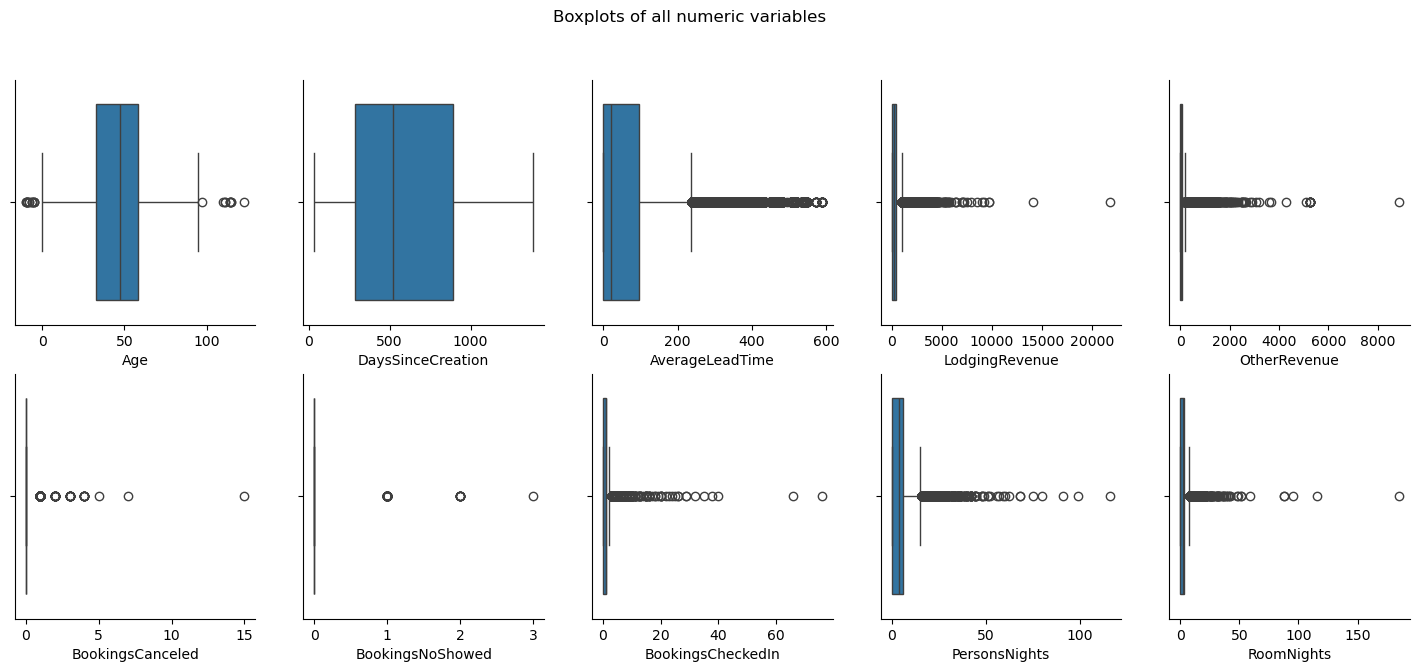

In [38]:
# BOXPLOT (Metric Features)

metric_features = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
                   'PersonsNights', 'RoomNights']

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,7))
for var, subplot in zip(df[metric_features], ax.flatten()):
    g = sns.boxplot(data=df,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes')
fig.suptitle("Boxplots of all numeric variables");

Binary Feature Visualisations

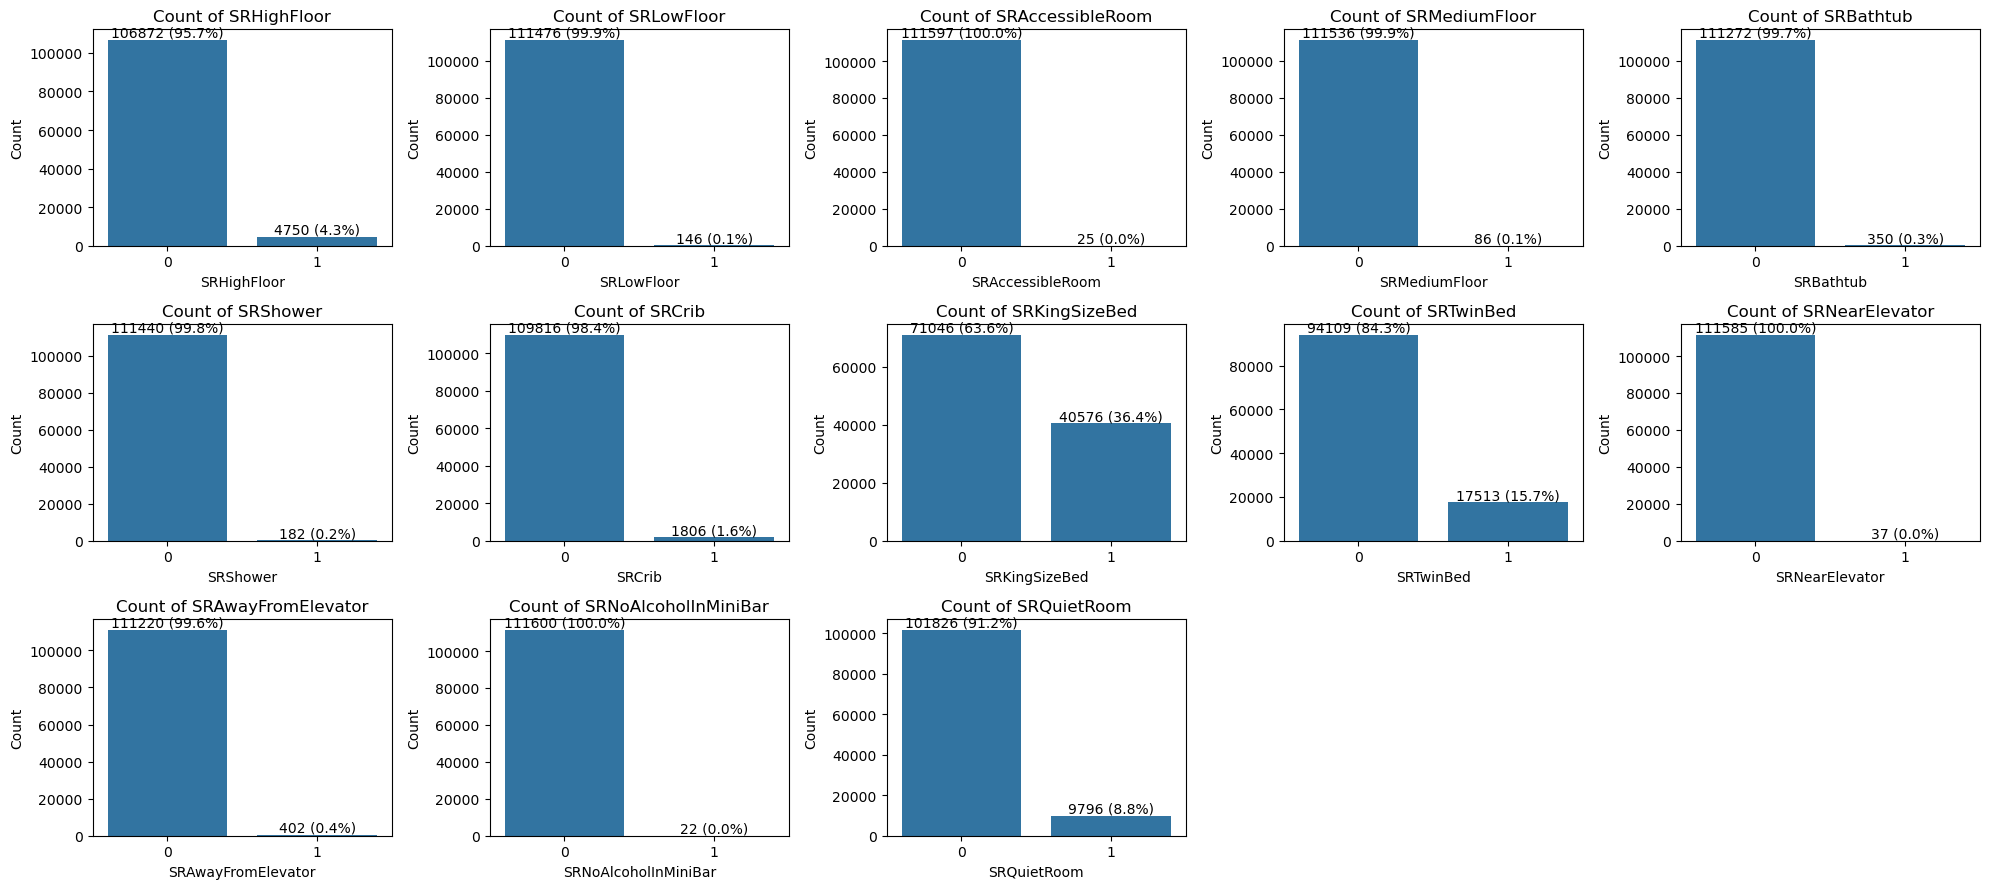

In [39]:
# Determine the number of rows and columns
num_features = len(binary_features)
num_cols = 5  # Number of columns (plots per row)
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 3 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i, feature in enumerate(binary_features):
    ax = axes[i]
    sns.countplot(x=feature, data=df, ax=ax)
    
    # Calculate the percentages
    total = len(df[feature])
    for p in ax.patches:
        count = int(p.get_height())  # Ensure count is an integer
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count} ({percentage})', (x, y), ha='center', va='bottom')
    
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [40]:
lodging_revenue_by_channel = df_eda.groupby('DistributionChannel')[['LodgingRevenue']].sum().round(1).sort_values(by='LodgingRevenue', ascending=False)
lodging_revenue_by_channel
#lodging_revenue_by_channel.plot(kind='barh', figsize=(7,4))
#plt.show()

,LodgingRevenue
DistributionChannel,
Travel Agent/Operator,25502185.4
Direct,4980814.1
Corporate,1027637.1
GDS Systems,201156.1


In [41]:
# Select columns starting with 'SR'
sr_columns = [col for col in df.columns if col.startswith('SR')]

# Melt the DataFrame to have all 'SR' columns in a single column
df_melted = df.melt(value_vars=sr_columns, var_name='SR', value_name='value')

# Group by the 'value' column (0 or 1) and count the occurrences
grouped_counts = df_melted.groupby(['SR', 'value']).size().unstack(fill_value=0)

grouped_counts


value,0,1
SR,,
SRAccessibleRoom,111597,25
SRAwayFromElevator,111220,402
SRBathtub,111272,350
SRCrib,109816,1806
SRHighFloor,106872,4750
SRKingSizeBed,71046,40576
SRLowFloor,111476,146
SRMediumFloor,111536,86
SRNearElevator,111585,37


In [42]:
df_eda.groupby('DistributionChannel')[['Age', 'LodgingRevenue', 'OtherRevenue', 'AverageLeadTime', 'DaysSinceCreation' ,'RoomNights']].mean().round()

,Age,LodgingRevenue,OtherRevenue,AverageLeadTime,DaysSinceCreation,RoomNights
DistributionChannel,,,,,,
Corporate,47.0,328.0,68.0,30.0,715.0,3.0
Direct,43.0,295.0,65.0,40.0,542.0,2.0
GDS Systems,44.0,289.0,36.0,21.0,536.0,2.0
Travel Agent/Operator,46.0,280.0,65.0,66.0,601.0,2.0


In [43]:
df_eda.head(2)

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
1,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,Portugal
2,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal


C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_4192\3038607997.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')


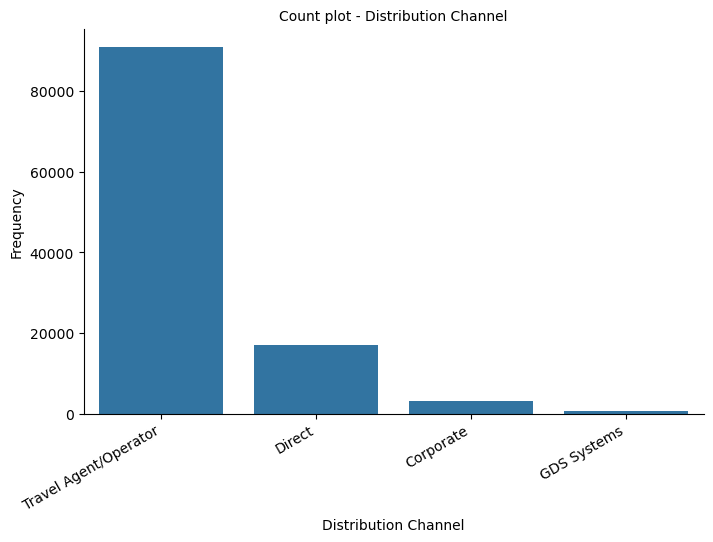

In [44]:

fig, ax = plt.subplots(figsize=(8, 5))

# Sort the 'MarketSegment' by frequency
order = df['DistributionChannel'].value_counts().index

# Plot the countplot with sorted order
g = sns.countplot(data=df, x='DistributionChannel', order=order)

# Rotate X-axis labels
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

# Decoration
sns.despine()
plt.title("Count plot - Distribution Channel", fontsize=10)
plt.xlabel("Distribution Channel")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=12)
plt.xticks(rotation=30)

plt.show()

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_4192\1136498203.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')


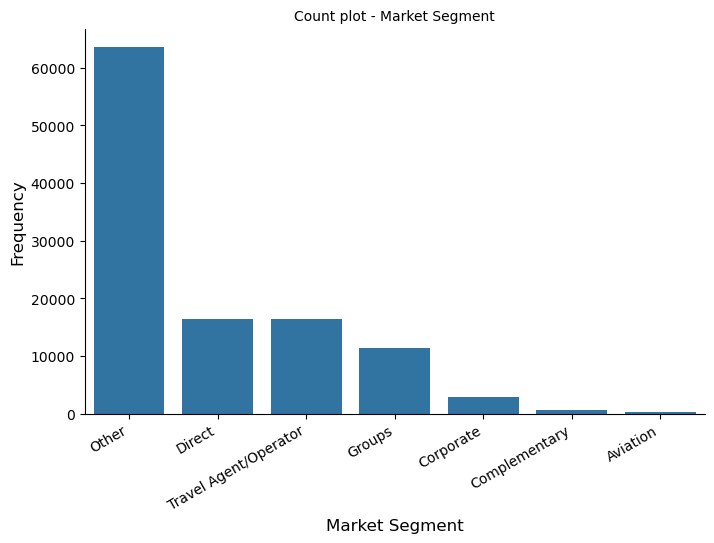

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))

# Sort the 'MarketSegment' by frequency
order = df['MarketSegment'].value_counts().index

# Plot the countplot with sorted order
g = sns.countplot(data=df, x='MarketSegment', order=order)

# Rotate X-axis labels
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

# Decoration
sns.despine()
plt.title("Count plot - Market Segment", fontsize=10)
plt.xlabel("Market Segment")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=12)
plt.xticks(rotation=30)

plt.show()

In [46]:
# Filter the DataFrame to get rows where 'DistributionChannel' is different from 'MarketSegment'
different_distribution_channel = df[df['DistributionChannel'] != df['MarketSegment']]

# Count the number of rows where 'DistributionChannel' is different from 'MarketSegment'
count_different_distribution_channel = different_distribution_channel.shape[0]
print(f"Number of rows where DistributionChannel is different from MarketSegment: {count_different_distribution_channel}")

Number of rows where DistributionChannel is different from MarketSegment: 77240


Market Segment and Distribution Channel

In [47]:
# Exploration of categorical variables: DistributionChannel and MarketSegment

table1 = pd.crosstab(index=df['DistributionChannel'], columns=df['MarketSegment'], margins=True, margins_name="Total")
table1

MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator,Total
DistributionChannel,,,,,,,,
Corporate,281,19,2204,13,480,37,99,3133
Direct,0,508,51,15965,171,151,30,16876
GDS Systems,0,0,2,7,5,677,5,696
Travel Agent/Operator,7,128,674,373,10794,62728,16213,90917
Total,288,655,2931,16358,11450,63593,16347,111622


By looking at the totals whe can assess that the categories "Aviation" and "Complementary" should be grouped into "Other" since they account for a very small percentage of the Market Segment. By doing this it will be easier for us to segment the market with less categories.

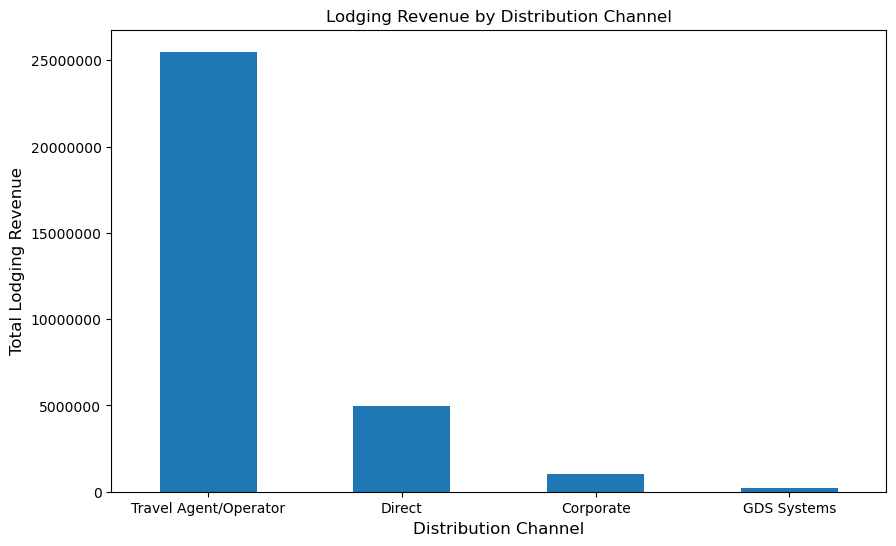

In [48]:
# Group by 'DistributionChannel' and sum the 'LodgingRevenue'
revenue_channel = df.groupby('DistributionChannel')['LodgingRevenue'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
revenue_channel.plot(kind='bar')
plt.title('Lodging Revenue by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Total Lodging Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.show()

In [49]:
# Represents the % of sales of each distribution channel
total_revenue = df['LodgingRevenue'].sum()
percentage_revenue_by_channel = ((revenue_channel / total_revenue) * 100).round(2)
percentage_revenue_by_channel

DistributionChannel
Travel Agent/Operator    80.42
Direct                   15.71
Corporate                 3.24
GDS Systems               0.63
Name: LodgingRevenue, dtype: float64

The amount of money spent per distribution channel is positively correlated with the frequency they are used.

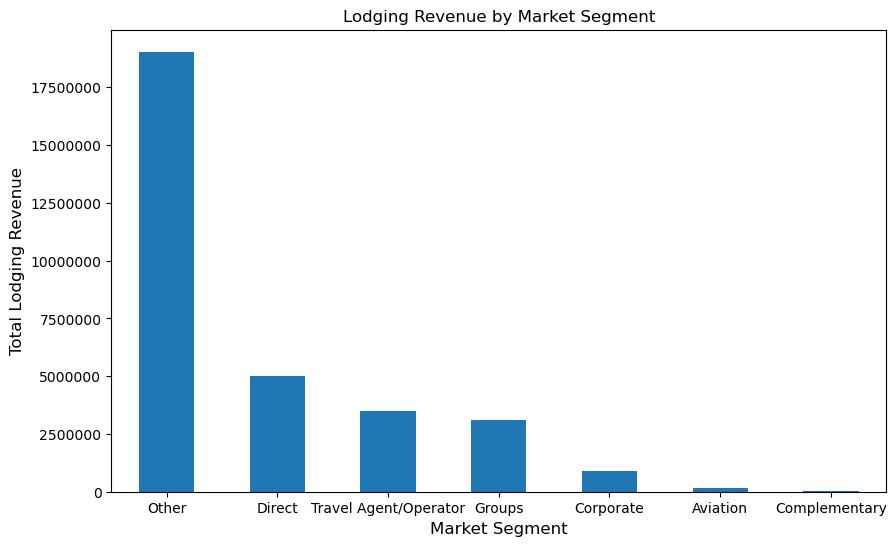

In [50]:
# Group by 'MarketSegment' and sum the 'LodgingRevenue'
revenue_by_marketsegment = df.groupby('MarketSegment')['LodgingRevenue'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
revenue_by_marketsegment.plot(kind='bar')
plt.title('Lodging Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Lodging Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.show()

In [51]:
# Represents the % of sales of each Market Segment

total_revenue_marketsegment = df['LodgingRevenue'].sum()
percentage_revenue_by_marketsegment = ((revenue_by_marketsegment / total_revenue_marketsegment) * 100).round(2)
percentage_revenue_by_marketsegment

MarketSegment
Other                    60.04
Direct                   15.81
Travel Agent/Operator    11.03
Groups                    9.77
Corporate                 2.82
Aviation                  0.48
Complementary             0.05
Name: LodgingRevenue, dtype: float64

The Market Segment follows the same logic has the Distribution Channel, the higher the frequency of the category, the higher the revenue associated with it

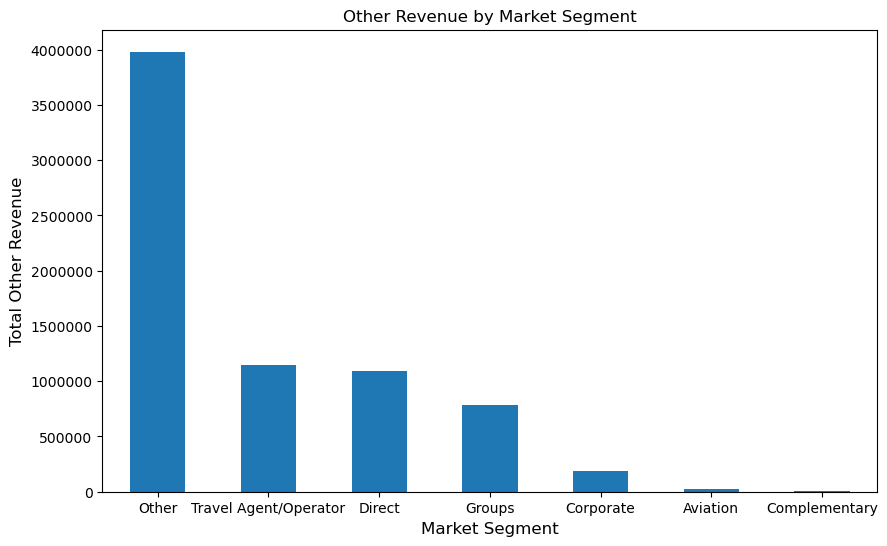

In [52]:
# Group by 'MarketSegment' and sum the 'OtherRevenue'
revenue_by_marketsegment_other = df.groupby('MarketSegment')['OtherRevenue'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
revenue_by_marketsegment_other.plot(kind='bar')
plt.title('Other Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Other Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.show()

In [53]:
# Represents the % of sales of each category

total_revenue_marketsegment2 = df['OtherRevenue'].sum()
percentage_revenue_by_marketsegment = ((revenue_by_marketsegment_other / total_revenue_marketsegment2) * 100).round(2)
percentage_revenue_by_marketsegment

MarketSegment
Other                    55.09
Travel Agent/Operator    15.84
Direct                   15.09
Groups                   10.91
Corporate                 2.60
Aviation                  0.32
Complementary             0.14
Name: OtherRevenue, dtype: float64

The same logic applies to other revenue

<Figure size 800x600 with 0 Axes>

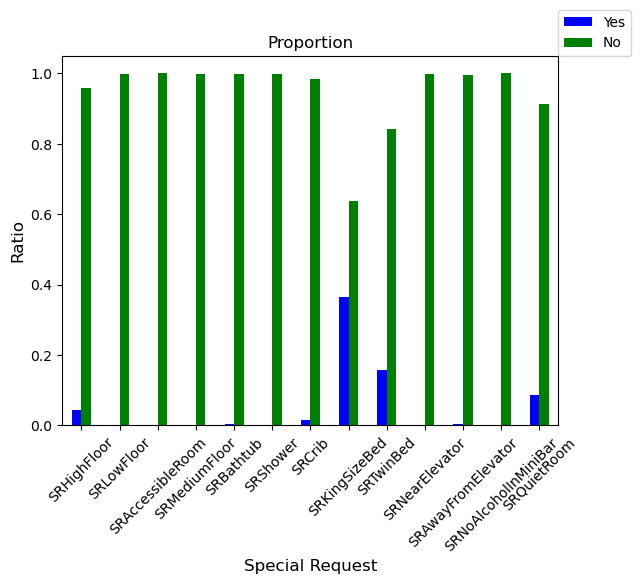

In [54]:
df2 = df[['SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom']]

proportions = pd.DataFrame({
    'Yes': df2.mean(),
    'No': 1 - df2.mean()
})

plt.figure(figsize=(8, 6))
proportions.plot(kind='bar', color=['blue', 'green'])
plt.title('Proportion')
plt.xlabel('Special Request')
plt.ylabel('Ratio')
plt.legend(loc=(1,1))
plt.xticks(rotation=45)
plt.show()

The majority of the requests made are related to King Size Bed, Twin Bed, No Alcochol in Mini Bar, High Floor and Crib

Correlation Matrix


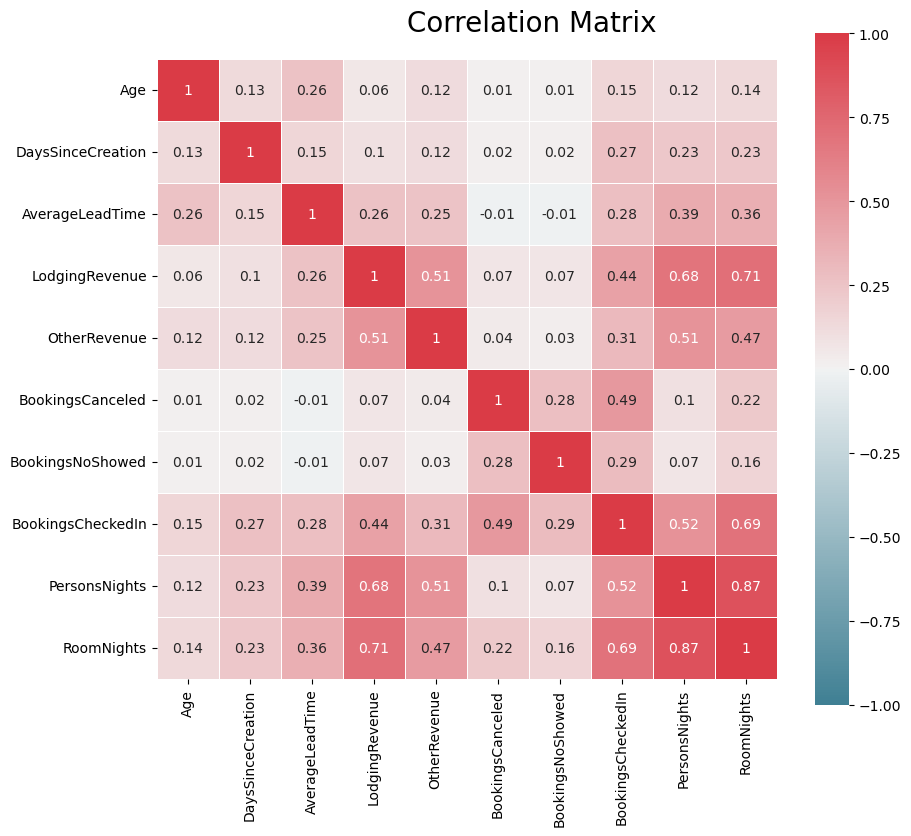

In [55]:

fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_features].corr(method="pearson"), decimals=2)

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=corr.values, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='g', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [56]:
df_eda['NameHash'].duplicated().sum()

4038

In [57]:
df_eda[df_eda['NameHash'].duplicated()]

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
267,NaN,1382,0xE772569A3B92E99EBDE5F2DB0BCAC8E88B03ED52F284...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,4.00,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
303,32.0,1381,0xA90ADB910E3726F160E13364506D918EA414B59C243A...,0xA4742127FE2596D6FAADBFA155EFDF79D23A2419103B...,39,925.5,186.00,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
448,53.0,1376,0x05842189D4980DE3E463F1C49202001E6D433F246F48...,0x2A84DA7C5E0703A07903A23A1077A93D01F041FA3F50...,0,75.0,26.00,0,0,1,...,0,0,0,0,0,0,0,0,0,Angola
496,53.0,1371,0x05842189D4980DE3E463F1C49202001E6D433F246F48...,0xC9C602E10458C3AC8C97A23D961217266A0D8038513C...,0,134.0,28.00,0,0,1,...,0,0,0,0,0,0,0,0,0,Angola
497,19.0,1371,0xCA45507F6EEBD2BF107402EB5EF7A82802CB8501F2D8...,0xD340880F2B5040688D70EA73262D977556D84542A66D...,0,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111352,54.0,39,0x05ACC2AEB73F8A40BCDF90175DE9935D36F8D6632E60...,0x769F23C18265E2D8B03CE2EC6F6124C5BD000EE63198...,0,0.0,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,France
111481,25.0,39,0x3AF382DA3EBC7E72C1F5BA635FBB7ED7D45FE0F5415F...,0x27A1F2DAF1F46F17A2AF982D601007BFA13EA5B1528B...,0,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,Germany
111572,35.0,38,0x87E907A2D43E25D3E3D56D7016D9447D4D646CCD7CFE...,0x4AAF782C86F1B4F015C85E005271AF3FAF25AEA6DFF6...,2,113.0,12.00,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal


In [58]:
df_eda[df_eda['NameHash'] == '0xE772569A3B92E99EBDE5F2DB0BCAC8E88B03ED52F284229FE65FD3889C3493F8']

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
266,37.0,1382,0xE772569A3B92E99EBDE5F2DB0BCAC8E88B03ED52F284...,0x8C2B29E07E51619D3E253A32BE21927C99E5C421037A...,43,219.0,48.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
267,NaN,1382,0xE772569A3B92E99EBDE5F2DB0BCAC8E88B03ED52F284...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,4.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal


In [59]:
df_eda[df_eda['MarketSegment'] == 'Complementary']

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
39,NaN,1385,0xF365E1EC454A18DB722D1DBD8886E027CD4B1234B8A9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
40,NaN,1385,0x581FBBDFCA174BB597E096E3A9CBED5E1A9FD615844B...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
59,NaN,1385,0x51764F97FD9E3426C98D7DFEFE3A2A2D3C724089ECFB...,NaN,0,0.0,2.0,0,0,2,...,0,0,0,0,0,0,0,0,0,Portugal
267,NaN,1382,0xE772569A3B92E99EBDE5F2DB0BCAC8E88B03ED52F284...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,44,0.0,4.0,0,0,1,...,0,0,0,0,0,0,0,0,0,Portugal
429,NaN,1377,0x1E1405806B8504265C773BEEF865BE906531FE99CCFE...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,1,0.0,8.0,0,0,12,...,0,0,0,0,1,0,0,0,0,Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108748,37.0,60,0x0F612361CD2D350C1696E043BCDED454CE26F439EF54...,0x7E0E892D7FABF256CEAFD1981989CA352E15D8AD5969...,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Portugal
109312,48.0,55,0x6303926D8892037E60B7A372DFE7D2FAD544420B566C...,0x8FEA25577B5C3BD878128DFDF0EE140B7CEBE5F2BFCC...,8,0.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,Portugal
109366,59.0,55,0x5208B365ECB706685A00A16D131AEAEC63208B3B5BC4...,0x6C6CBE81716B51F09ECE9AD8CBB82E1AB5175CEFBC5B...,1,0.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,0,Portugal


In [60]:
df_eda[df_eda['NameHash'] == '0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71EAD7AC67378CA39E2A7F']

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
31,40.0,1385,0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...,0xC3A4B390B366380E10ECEE8B00DBCF8EE466E474CC1B...,1,1083.5,255.49,0,0,9,...,0,0,0,1,0,0,0,0,0,Portugal
3113,40.0,1308,0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...,0xC3A4B390B366380E10ECEE8B00DBCF8EE466E474CC1B...,0,35.0,16.00,0,0,1,...,0,0,0,1,0,0,0,0,0,Portugal
19971,40.0,1035,0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...,0xC3A4B390B366380E10ECEE8B00DBCF8EE466E474CC1B...,10,330.5,90.50,0,0,2,...,0,0,0,1,0,0,0,0,0,Portugal
21114,40.0,1007,0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...,0xC3A4B390B366380E10ECEE8B00DBCF8EE466E474CC1B...,0,586.0,68.50,0,0,3,...,0,0,0,1,0,0,0,0,0,Portugal
27488,40.0,895,0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...,0xC3A4B390B366380E10ECEE8B00DBCF8EE466E474CC1B...,0,79.0,7.00,0,0,1,...,0,0,0,1,0,0,0,0,0,Portugal


In [61]:
# Find duplicate rows based on both 'Name' and 'DocIDHash'
df_eda[df_eda.duplicated(subset=['NameHash', 'DocIDHash'], keep=False)]


,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name
ID,,,,,,,,,,,,,,,,,,,,,
31,40.0,1385,0xABB194D1F11E1245B0EA33CA97882DCE7640285CBB71...,0xC3A4B390B366380E10ECEE8B00DBCF8EE466E474CC1B...,1,1083.5,255.49,0,0,9,...,0,0,0,1,0,0,0,0,0,Portugal
33,42.0,1385,0xCD370C60479B203E6EAA61BC39625A89AF23FD5644AB...,0x9685D374CBB94779513634BF0111DC9C2750F6BBC1B1...,0,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,Portugal
36,64.0,1385,0x2892853ACDE4F91C8DB84FF2FB21F65B83180956A75C...,0xA46A1032FC70B0836182BC3166E4CFAB334F9CD82120...,0,0.0,0.00,0,0,0,...,0,0,1,0,0,0,0,0,0,Portugal
123,42.0,1384,0x13F3ADE170EB89A77D2382F53F46AB6F508114BC8F4C...,0x7DECF4D79050842C98BC061E9FC77F6EC1042B1A41F2...,2,404.5,473.30,0,0,1,...,0,0,1,1,0,0,0,0,0,Portugal
403,39.0,1379,0x151534153AD90C917F2ECC4969626BEA37E66E0F85C3...,0xBDF406844F5C6F19839DEA4A9EF9B5496B5D4E2D07CC...,20,219.0,52.50,0,0,1,...,0,0,0,0,0,0,0,0,0,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111323,8.0,40,0x855D1540E591F6640709E8BB6F6BE26F04EBEBD3510F...,0x6CF7256E1B20F60DA11D590BF376C205A10D23FA68B1...,0,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,Luxembourg
111344,75.0,40,0x1441D0635E3493605030DEA783DAC8B924A3EE9A7298...,0x46AF3DF631BB4FA041D897E43A1679FD8F77E3793B6C...,0,0.0,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,France
111352,54.0,39,0x05ACC2AEB73F8A40BCDF90175DE9935D36F8D6632E60...,0x769F23C18265E2D8B03CE2EC6F6124C5BD000EE63198...,0,0.0,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,France


In [62]:
df_eda.groupby('country_name')[['DaysSinceCreation']].count()

,DaysSinceCreation
country_name,
Afghanistan,3
Albania,19
Algeria,86
American Samoa,4
Andorra,8
...,...
Viet Nam,34
"Virgin Islands, U.S.",2
Wallis and Futuna,2


In [63]:
# Filter for the last 366 days and group by 'country_name'
last_366_days = df_eda[df_eda["DaysSinceCreation"] <= 366].groupby('country_name')[['country_name']].count()
last_366_days = last_366_days.rename(columns={'country_name': 'SumLast366Days'})

# Group by 'country_name' for the entire DataFrame
total_db = df_eda.groupby('country_name')[['country_name']].count()
total_db = total_db.rename(columns={'country_name': 'TotalSum'})

# Merge both DataFrames on 'country_name'
result_df = last_366_days.merge(total_db, left_index=True, right_index=True)

# Sort the result DataFrame by 'SumLast366Days' in descending order
result_df = result_df.sort_values(by='SumLast366Days', ascending=False)

# Get the top 5 customers' nationalities for the last 366 days
top_10_nationalities = result_df.head(10)
top_10_nationalities

,SumLast366Days,TotalSum
country_name,,
Germany,5443,14805
France,5017,16507
Portugal,3427,14020
United Kingdom,3421,11459
United States,2329,5409
Spain,1575,6123
Brazil,1554,4036
Netherlands,1340,3792
Belgium,1242,4109


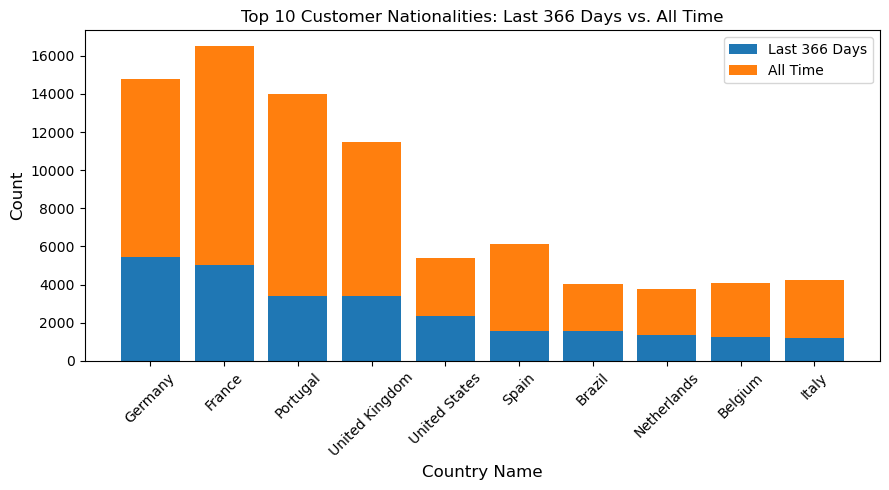

In [64]:
# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(9, 5))

# Define the positions for the bars
positions = range(len(top_10_nationalities.index))

# Plot the bars for SumLast366Days
ax.bar(positions, top_10_nationalities['SumLast366Days'], label='Last 366 Days')

# Plot the bars for TotalSum on top of the SumLast366Days
ax.bar(positions, top_10_nationalities['TotalSum'] - top_10_nationalities['SumLast366Days'], 
       bottom=top_10_nationalities['SumLast366Days'], label='All Time')

# Set labels and titles
ax.set_xlabel('Country Name')
ax.set_ylabel('Count')
ax.set_title('Top 10 Customer Nationalities: Last 366 Days vs. All Time')
ax.set_xticks(positions)
ax.set_xticklabels(top_10_nationalities.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [65]:
df_eda['total_bookings_paid'] = df_eda['BookingsCheckedIn'] + df_eda['BookingsNoShowed']
df_eda['mean_total_bookings_paid'] = df_eda['LodgingRevenue'] / df_eda['total_bookings_paid']

In [66]:
# due to lack of info about the solo variables in these 2 features, we believe it's easier for our analysis to have only one mix variable.
df_eda['PersonRoomNights'] = df_eda['PersonsNights'] + df_eda['RoomNights']
df_eda[['RoomNights', 'PersonsNights','PersonRoomNights']].head(2)

,RoomNights,PersonsNights,PersonRoomNights
ID,,,
1,4,6,10
2,5,10,15


In [67]:
# Group by 'DistributionChannel' and calculate the mean, rounding the results
mean_df = df_eda.groupby('DistributionChannel')[['Age', 'LodgingRevenue', 'OtherRevenue', 'AverageLeadTime', 'DaysSinceCreation' ,
                                                 'RoomNights', 'PersonsNights', 'PersonRoomNights', 'total_bookings_paid', 'mean_total_bookings_paid']].mean().round()

# Retrieve the number of times each DistributionChannel appears
count_df = df_eda['DistributionChannel'].value_counts().rename_axis('DistributionChannel').reset_index(name='customers')

# Merge the count DataFrame with the mean DataFrame
result_df = count_df.merge(mean_df, on='DistributionChannel')
result_df

,DistributionChannel,customers,Age,LodgingRevenue,OtherRevenue,AverageLeadTime,DaysSinceCreation,RoomNights,PersonsNights,PersonRoomNights,total_bookings_paid,mean_total_bookings_paid
0,Travel Agent/Operator,90917,46.0,280.0,65.0,66.0,601.0,2.0,4.0,7.0,1.0,inf
1,Direct,16876,43.0,295.0,65.0,40.0,542.0,2.0,4.0,6.0,1.0,427.0
2,Corporate,3133,47.0,328.0,68.0,30.0,715.0,3.0,4.0,7.0,1.0,265.0
3,GDS Systems,696,44.0,289.0,36.0,21.0,536.0,2.0,2.0,4.0,1.0,287.0


In [68]:
df_eda.groupby('DistributionChannel')[['Age', 'LodgingRevenue', 'OtherRevenue', 'AverageLeadTime', 'DaysSinceCreation' ,
                                       'RoomNights', 'PersonsNights', 'PersonRoomNights', 'total_bookings_paid', 'mean_total_bookings_paid']].mean().round()

,Age,LodgingRevenue,OtherRevenue,AverageLeadTime,DaysSinceCreation,RoomNights,PersonsNights,PersonRoomNights,total_bookings_paid,mean_total_bookings_paid
DistributionChannel,,,,,,,,,,
Corporate,47.0,328.0,68.0,30.0,715.0,3.0,4.0,7.0,1.0,265.0
Direct,43.0,295.0,65.0,40.0,542.0,2.0,4.0,6.0,1.0,427.0
GDS Systems,44.0,289.0,36.0,21.0,536.0,2.0,2.0,4.0,1.0,287.0
Travel Agent/Operator,46.0,280.0,65.0,66.0,601.0,2.0,4.0,7.0,1.0,inf


PreferredFloor: Categorization based on (SRHighFloor, SRMediumFloor, SRLowFloor)
PreferredBedType: Categorization based on (SRKingSizeBed, SRTwinBed)
PreferredBathroomType: Categorization based on (SRBathtub, SRShower)
NoisePreference: Categorization based on (SRQuietRoom, SRAwayFromElevator, SRNearElevator)
BookingFrequency = TotalBookings / DaysSinceCreation

In [69]:
df_eda.columns

Index(['Age', 'DaysSinceCreation', 'NameHash', 'DocIDHash', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'MarketSegment', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'country_name',
       'total_bookings_paid', 'mean_total_bookings_paid', 'PersonRoomNights'],
      dtype='object')

In [70]:
# Define a function to merge the columns
def merge_floors(row):
    if row['SRLowFloor'] == 1:
        return 'Low_Floor'
    elif row['SRMediumFloor'] == 1:
        return 'Medium_Floor'
    elif row['SRHighFloor'] == 1:
        return 'High_Floor'
    else:
        return 'No_preference'  # In case all values are 0

# Apply the function to create the new column
df_eda['floor_preference'] = df_eda.apply(merge_floors, axis=1)
df_eda['floor_preference'].value_counts()


floor_preference
No_preference    106643
High_Floor         4748
Low_Floor           146
Medium_Floor         85
Name: count, dtype: int64

In [71]:
# 3 casos em que existe mais que uma preferência, contudo podemos assumir como no_preference.
df_eda['preferences_sum'] = df_eda[['SRLowFloor', 'SRMediumFloor', 'SRHighFloor']].sum(axis=1)

# Create a new column to indicate multiple preferences
df_eda[df_eda['preferences_sum'] > 1]

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name,total_bookings_paid,mean_total_bookings_paid,PersonRoomNights,floor_preference,preferences_sum
ID,,,,,,,,,,,,,,,,,,,,,
25859,51.0,921,0x70B6FD2D234235C3DE6F4B82879F6305D0E111670AB0...,0xB524FBB5D5127698F6E182836043FBA8CCD397612416...,127,2020.00,220.0,0,0,1,...,0,0,0,0,Sweden,1,2020.00,10,Medium_Floor,2
26127,NaN,916,0xD9D619554D9AADB4D47DBAD05FA8DC655F924173367F...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,74,506.25,92.5,0,0,1,...,0,0,0,1,Portugal,1,506.25,20,Low_Floor,2
27802,45.0,891,0x1AF54B13068BC4F019B15A1634A3058DCF8CB3BCE045...,0x3FE43086574BC0D49ECCE2AE3E9A864449F438F860A5...,90,114.00,14.0,0,0,1,...,0,0,0,1,United Kingdom,1,114.00,3,Low_Floor,2


In [72]:
# Define a function to merge the columns
def merge_beds(row):
    if row['SRKingSizeBed'] == 1:
        return 'King Size Bed'
    elif row['SRTwinBed'] == 1:
        return 'Twin Bed'
    else:
        return 'No_bed_preference'  # In case all values are 0 or both preferences

# Apply the function to create the new column
df_eda['bed_preference'] = df_eda.apply(merge_beds, axis=1)
df_eda['bed_preference'].value_counts()

bed_preference
No_bed_preference    53806
King Size Bed        40576
Twin Bed             17240
Name: count, dtype: int64

In [73]:
# Define a function to merge the columns
def merge_bathroom(row):
    if row['SRBathtub'] == 1:
        return 'Bathtub'
    elif row['SRShower'] == 1:
        return 'Shower'
    else:
        return 'No preference'  # In case all values are 0 or both preferences

# Apply the function to create the new column
df_eda['bathroom_preference'] = df_eda.apply(merge_bathroom, axis=1)
df_eda['bathroom_preference'].value_counts()

bathroom_preference
No preference    111090
Bathtub             350
Shower              182
Name: count, dtype: int64

In [74]:
# Define a function to merge the columns
def merge_noise(row):
    if row['SRQuietRoom'] == 1:
        return 'Quiet Room'
    elif row['SRAwayFromElevator'] == 1:
        return 'Away Elevator'
    elif row['SRNearElevator'] == 1:
        return 'Near Elevator'
    else:
        return 'No Preference'  # In case all values are 0

# Apply the function to create the new column
df_eda['noise_preference'] = df_eda.apply(merge_noise, axis=1)
df_eda['noise_preference'].value_counts()

noise_preference
No Preference    101552
Quiet Room         9796
Away Elevator       242
Near Elevator        32
Name: count, dtype: int64

In [75]:
df_eda['sum_preferences'] = df_eda[binary_features].sum(axis=1)

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 4 Data Cleaning
    

</div>

In [76]:
df_cleaned = df.copy()

## Inconsistencies

#### Person Nights and Room Nights

In [77]:
# Check how much records have PersonNights < RoomNights

df_cleaned[df_cleaned['PersonsNights'] < df_cleaned['RoomNights']].shape[0]

28

It doesn´t make sense for RoomNights > PersonNights, so we are going to remove those rows

In [78]:
# Eliminate rows where 'PersonsNights' is less than 'RoomNights'
df_cleaned = df_cleaned[df_cleaned['PersonsNights'] >= df_cleaned['RoomNights']]
print (df_cleaned.shape)
print (df.shape)
# 28 rows eliminated

(111594, 29)
(111622, 29)


### Age inconsistencies

In [79]:
# Remove rows where 'Age' is below 0, but keep rows with missing 'Age' values
df_cleaned = df_cleaned[(df_cleaned['Age'] >= 0) | df_cleaned['Age'].isnull()]

In [80]:
# Count the number of people with age under 18
num_under_18 = df_cleaned[df_cleaned['Age'] < 18].shape[0]

print('Number of people with age under 18:', num_under_18)

Number of people with age under 18: 6875


In [81]:
# Remove rows where 'Age' is below 18, but keep rows with missing 'Age' values
df_cleaned = df_cleaned[(df_cleaned['Age'] >= 18) | df_cleaned['Age'].isnull()]

#### Room preferences Inconsistencies - We didn´t observe any cases where oposite requests happened at the same time


In [82]:
df_cleaned[(df_cleaned['SRBathtub'] == 1) & (df_cleaned['SRShower'] == 1)].shape[0]


0

In [83]:
df_cleaned[(df_cleaned['SRNearElevator'] == 1) & (df_cleaned['SRAwayFromElevator'] == 1)].shape[0]

0

In [84]:
## mas acontece raramente medium and other
df_cleaned[(df_cleaned['SRHighFloor'] == 1) & (df_cleaned['SRLowFloor'] == 1) & (df_cleaned['SRMediumFloor'] == 1)].shape[0]

0

### Revenue and Booking

Customers that generated no revenue to the hotel

In [85]:
# this variable stores the customers that have no revenue at all

costumers_no_revenue = df_cleaned[(df_cleaned['LodgingRevenue'] == 0) & (df_cleaned['OtherRevenue'] == 0)]
costumers_no_revenue.shape



(27589, 29)

Customers that didn´t engage with bookings but are in the data set


In [86]:
#This variable stores the customers that didn´t engage with bookings but are in the data set

no_engagement_customers = df_cleaned[(df_cleaned['BookingsCanceled'] == 0) & (df_cleaned['BookingsNoShowed'] == 0) & (df_cleaned['BookingsCheckedIn'] == 0)]
no_engagement_customers.shape

(27259, 29)

In [87]:
#Perguntar ao stor se é possivel estes casos com gasto e booking zero ou se sao erros caso sejam erros remover do dataset

In [88]:
duplicatesDocId = df_cleaned[df_cleaned.duplicated(subset=['DocIDHash'], keep=False)]

print('DocIdHash variable has', duplicatesDocId.shape[0], 'number of duplicates.' )

DocIdHash variable has 10869 number of duplicates.


In [89]:
print(duplicatesDocId['DocIDHash'].nunique(), ' number of unique values found in the Duplicate Records in DocIDHash')

2916  number of unique values found in the Duplicate Records in DocIDHash


After data treatment store the new version in the regular df 

In [90]:
df=df_cleaned.copy()
df_cleaned

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name,continent
ID,,,,,,,,,,,,,,,,,,,,,
1,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,...,0,0,0,0,0,0,0,0,Portugal,Europe
2,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,Portugal,Europe
3,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,Germany,Europe
4,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,0,France,Europe
5,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,France,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,...,0,0,1,0,0,0,0,0,Germany,Europe
111730,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,...,0,0,1,0,0,0,0,0,Brazil,America
111731,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,...,0,0,1,0,0,0,0,0,Brazil,America


# OUTLIERS

In [91]:
df_outliers= df.copy()

In [92]:
df_outliers.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,100619.000000,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000,...,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000,104705.000000
mean,48.026466,609.305936,63.896309,295.663234,67.444960,0.002321,0.000602,0.775054,4.537491,2.311972,...,0.000745,0.003008,0.001662,0.012062,0.362896,0.157223,0.000353,0.003629,0.000162,0.087159
std,15.082042,375.801686,86.146231,371.112038,123.725518,0.081790,0.028486,0.696196,4.619654,2.193681,...,0.027284,0.054767,0.040732,0.109165,0.480837,0.364012,0.018795,0.060134,0.012741,0.282069
min,18.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,303.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,539.000000,26.000000,226.000000,36.000000,0.000000,0.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,909.000000,99.000000,404.700000,88.000000,0.000000,0.000000,1.000000,6.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,123.000000,1385.000000,588.000000,14044.800000,8859.250000,15.000000,3.000000,76.000000,116.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


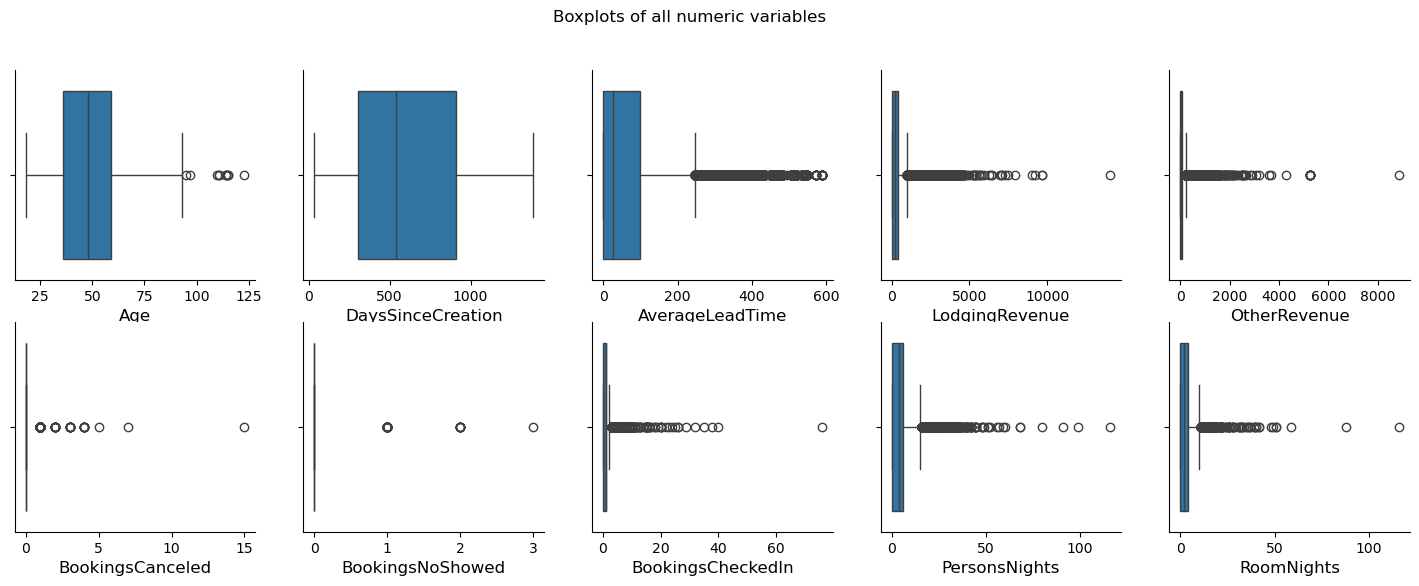

In [93]:
# BOXPLOT (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(2, 5, figsize=(18,6))
for var, subplot in zip(df[metric_features], ax.flatten()):
    g = sns.boxplot(data=df,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=10)
fig.suptitle("Boxplots of all numeric variables", fontsize=12);

In [94]:
#Since we have few outliers we have decided to remove them manually
#Besides Age, where we decided based on general knowledge, the rest of the variables were based on the boxplots above

filters_outliers = (
    (df_outliers['Age'].between(0, 100) | df_outliers['Age'].isnull())  #Age higher than 100 is highly unlikely and probbaly a data entry error
    &
    (df_outliers['AverageLeadTime'].between(0, 590))
    &
    (df_outliers['OtherRevenue'] <= 4000) 
    &
    (df_outliers['RoomNights'] <= 70)
    &
    (df_outliers['LodgingRevenue'] <= 11000) 
    &
    (df_outliers['BookingsCanceled'] <= 10) 
    &
    (df_outliers['PersonsNights'] <= 70) 
    &
    (df_outliers['BookingsCheckedIn'] <= 50)    
)

df_filters_outliers = df_outliers[filters_outliers]
print('Percentage of data kept after removing outliers:', np.round(df_filters_outliers.shape[0] / df_outliers.shape[0], 4))

Percentage of data kept after removing outliers: 0.9996


The outliers only represent 0.0004% of our data so we will removed them since we find it acceptable by our standards

In [95]:
# Update the our main df with the changes 
df= df_filters_outliers.copy()

# Missing Values

In [96]:
df_mv = df.copy()

In [97]:
df_mv.isna().sum()

Age                     4085
DaysSinceCreation          0
NameHash                   0
DocIDHash                932
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
country_name               0
continent                  0
dtype: int64

### DocIdHash Missing values

In [98]:
# Attempt to understand if the missing values in the DocIdHash variable are due to data entry errors or if they are valid cases that may have a corresponding row in the data set with expection of the missing value

# Identify rows where DocIDHash is missing
missing_docid_rows = df_mv[df_mv['DocIDHash'].isna()]

# Function to check if a row matches any other row in the dataset (excluding DocIDHash)
def row_matches_any_other(row, df):
    # Drop the DocIDHash column for comparison
    row_without_docid = row.drop('DocIDHash')
    df_without_docid = df.drop(columns=['DocIDHash'])
    
    # Check if the row matches any row in the dataset
    return any((df_without_docid == row_without_docid).all(axis=1))

# Check for each row with missing DocIDHash if it matches any other row in the dataset
results = missing_docid_rows.apply(lambda row: row_matches_any_other(row, df_mv), axis=1)

# Print the results
print("Do rows with missing DocIDHash match any other row in the dataset (excluding DocIDHash)?")
print(results)

Do rows with missing DocIDHash match any other row in the dataset (excluding DocIDHash)?
ID
59        False
501       False
511       False
512       False
805       False
          ...  
111126    False
111549    False
111631    False
111634    False
111635    False
Length: 932, dtype: bool


In [99]:
Em Doc Dash ID apagamos os que nao teem valor, pois nao faz sentido ter um valor nulo nesta variavel

SyntaxError: invalid syntax (3882062568.py, line 1)

### Age Missing values

In [100]:
median_age = df_mv['Age'].median()

# Impute missing values in 'Age' with the median
df_mv['Age'].fillna(median_age, inplace=True)

C:\Users\gonca_wvx8e21\AppData\Local\Temp\ipykernel_4192\2763894194.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mv['Age'].fillna(median_age, inplace=True)


In [ ]:
#Make sure the missing values were properly imputed
df_mv['Age'].isna().sum()

0

Update the main df

In [104]:
df= df_mv.copy()

In [ ]:
Can we calculate the R2 without a target variable?
Usamos mediana ou KNN para missing values em idade 

# Selecting only the 'age' column
#age_column = df_mv[['Age']]

# Initializing KNN imputer
#imputer = KNNImputer(n_neighbors=3)

# Imputing missing values in the 'age' column
#imputed_age_column = imputer.fit_transform(age_column)

# Replace the 'age' column in the original DataFrame with the imputed values
#df_mv['Age'] = imputed_age_column

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 5 Features
    

</div>

**For Kmeans we should use features that can be measure such as**:
- Age
- DaysSinceCreation
- AverageLeadTime
- LodgingRevenue
- OtherRevenue
- PersonsNights
- RoomNights
- Bookings

In [149]:
df_eng=df.copy()

In [150]:
df_eng

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name,continent
ID,,,,,,,,,,,,,,,,,,,,,
1,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,...,0,0,0,0,0,0,0,0,Portugal,Europe
2,48.0,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,Portugal,Europe
3,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,Germany,Europe
4,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,0,France,Europe
5,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,France,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,...,0,0,1,0,0,0,0,0,Germany,Europe
111730,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,...,0,0,1,0,0,0,0,0,Brazil,America
111731,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,...,0,0,1,0,0,0,0,0,Brazil,America


In [151]:
cont_region_list = {
    "Southern Europe": ['San Marino', 'Gibraltar', 'Andorra', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Greece', 'Hungary', 'Italy', 'Malta', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain'],
    "Western Europe": ['Monaco', 'Austria', 'Belgium', 'France', 'Germany', 'Liechtenstein', 'Luxembourg', 'Netherlands', 'Switzerland'],
    "Northern Europe": ['Svalbard and Jan Mayen', 'Jersey', 'Saint Pierre and Miquelon', 'Faroe Islands', 'Denmark', 'Estonia', 'Finland', 'Iceland', 'Ireland', 'Latvia', 'Lithuania', 'Norway', 'Sweden', 'United Kingdom'],
    "North America": ['United States', 'Canada'],
    "Asia": ['Timor-Leste', 'Maldives', 'Afghanistan', 'United Arab Emirates', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bahrain', 'Brunei', 'Bhutan', 'China', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kyrgyzstan', 'South Korea', 'Kuwait', 'Laos', 'Lebanon', 'Sri Lanka', 'Macau', 'Malaysia', 'Myanmar', 'Mongolia', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Syria', 'Thailand', 'Tajikistan', 'Turkmenistan', 'East Timor', 'Taiwan', 'Uzbekistan', 'Vietnam', 'Yemen'],
    "Central and South America": ['United States Minor Outlying Islands', 'Mexico', 'Grenada', 'Bermuda', 'Honduras', 'French Guiana', 'U.S. Virgin Islands', 'Haiti', 'Falkland Islands', 'Antigua and Barbuda', 'Cayman Islands', 'Nicaragua', 'Saint Kitts and Nevis', 'Puerto Rico', 'Suriname', 'Guatemala', 'Saint Lucia', 'Guyana', 'Dominican Republic', 'Cuba', 'Dominica', 'El Salvador', 'Anguilla', 'Aruba', 'Barbados', 'Paraguay', 'Jamaica', 'Bolivia', 'Panama', 'Costa Rica', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Peru', 'Uruguay', 'Venezuela'],
    "North Africa": ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Republic of the Congo', 'Ivory Coast', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda'],
    "South and Central Africa": ['Angola', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Republic of the Congo', 'Ivory Coast', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda']
}


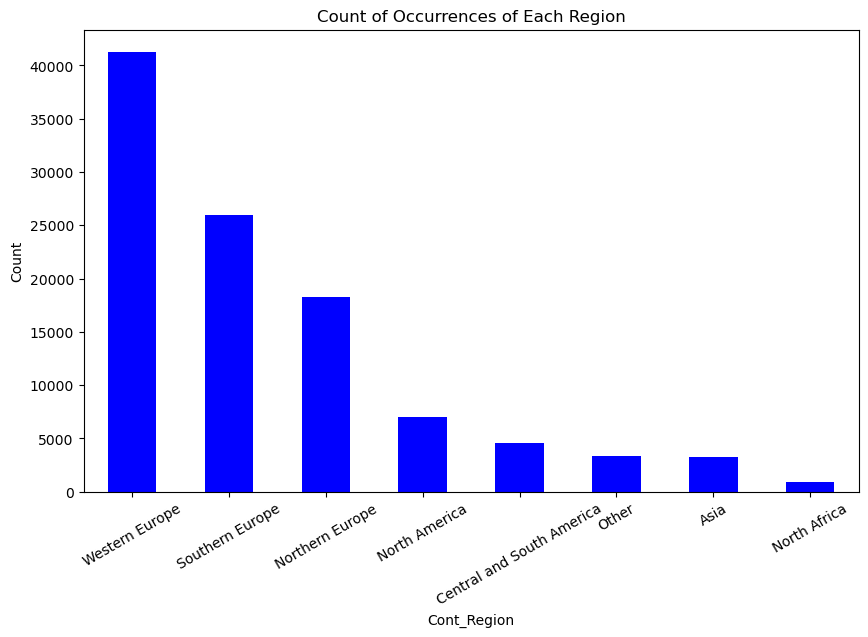

In [152]:
# Function to map country to region
def get_region(country):
    for region, countries in cont_region_list.items():
        if country in countries:
            return region
    return 'Other'  # If country not found in the dictionary

# Add a new column 'Region' based on 'country'
df_eng['Cont_Region'] = df_eng['country_name'].map(lambda x: get_region(x))

# Plotting the count of occurrences of each region
plt.figure(figsize=(10, 6))
df_eng['Cont_Region'].value_counts().plot(kind='bar', color='blue')
plt.title('Count of Occurrences of Each Region')
plt.xlabel('Cont_Region')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

In [153]:
df_eng['Cont_Region'].value_counts()

Cont_Region
Western Europe               41300
Southern Europe              25997
Northern Europe              18241
North America                 7025
Central and South America     4598
Other                         3316
Asia                          3244
North Africa                   946
Name: count, dtype: int64

In [154]:
df_eng

,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,country_name,continent,Cont_Region
ID,,,,,,,,,,,,,,,,,,,,,
1,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,...,0,0,0,0,0,0,0,Portugal,Europe,Southern Europe
2,48.0,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,Portugal,Europe,Southern Europe
3,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,Germany,Europe,Western Europe
4,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,France,Europe,Western Europe
5,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,France,Europe,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,...,0,1,0,0,0,0,0,Germany,Europe,Western Europe
111730,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,...,0,1,0,0,0,0,0,Brazil,America,Central and South America
111731,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,...,0,1,0,0,0,0,0,Brazil,America,Central and South America


In [155]:
df_eng['TotalRevenue'] = df_eng['LodgingRevenue'] + df_eng['OtherRevenue']

In [156]:
df_eng['RoomRate'] = (df_eng['TotalRevenue']/df_eng['RoomNights']).round(2)

In [157]:
df_eng['TotalPreferences'] = df_eng['SRHighFloor'] + df_eng['SRLowFloor'] + df_eng['SRAccessibleRoom'] + df_eng['SRMediumFloor'] + df_eng['SRBathtub'] + df_eng['SRShower'] + df_eng['SRCrib'] + df_eng['SRKingSizeBed'] + df_eng['SRTwinBed'] + df_eng['SRNearElevator'] + df_eng['SRAwayFromElevator'] + df_eng['SRNoAlcoholInMiniBar'] + df_eng['SRQuietRoom']

In [159]:
df_eng['TotalBookings'] = df_eng['BookingsCanceled'] + df_eng['BookingsNoShowed'] + df_eng['BookingsCheckedIn']

In [160]:
df_eng['CancelRate'] = (df_eng['BookingsCanceled']/df_eng['TotalBookings'])*100

In [161]:
# Transforming the variable 'DaysSinceCreation' so it can give us the number of years instead of the number of days
df_eng['YearsSinceCreation'] = (df_eng['DaysSinceCreation'] / 365.25).round(2)

In [162]:
df_eng['NumberPeople'] = df_eng['PersonsNights'] / df_eng['RoomNights']

In [163]:
df_eng = df_eng[df_eng['RoomRate'] >= 50]
df_eng = df_eng[df_eng['RoomRate'] <= 1500]

In [164]:
df_eng['RevenuePerPerson'] = df_eng['RoomRate']/df_eng['NumberPeople']

In [165]:
df_eng['RevenuePerBooking'] = (df_eng['TotalRevenue']/(df_eng['BookingsCheckedIn']))

Categories based on business? For example:

- Short Period of Time (0-7 days)

- Moderate Period of Time (8-30 days)

- Long Period of Time (31+ days)

In [166]:
# Replace the ages for a bracket interval in order to group people

bins = [0,8, 31, 1000]
labels = ['0-7 days', '8-30 days', '31+ days']
df_eng['AverageLeadTime_cat'] = pd.cut(df_eng['AverageLeadTime'], bins=bins, labels=labels, right=False)

In [167]:
df_eng['AverageLeadTime_cat'].value_counts()

AverageLeadTime_cat
31+ days     49709
8-30 days    14615
0-7 days     12420
Name: count, dtype: int64

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 6 Models
    

</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
# 7 Clusters Analysis and Recommendations
    

</div>